# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [4]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [5]:
len(data)

506

Общая гистограмма

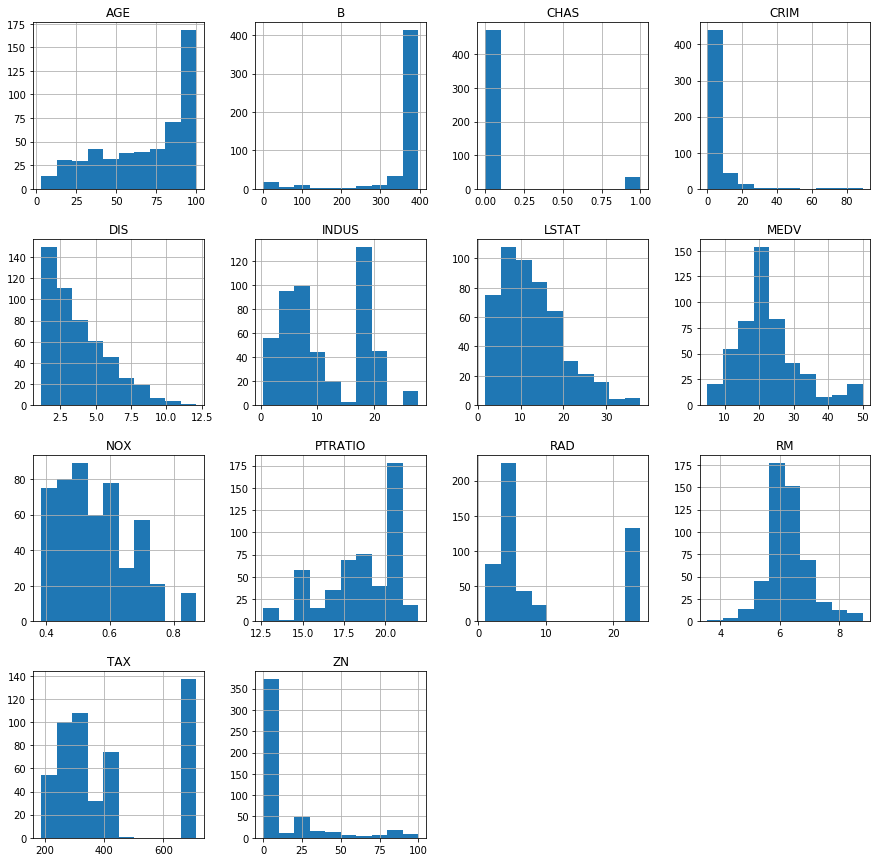

In [6]:
data.hist(figsize=(15,15))
plt.show()

Построение отдельных гистограмм по каждой переменной

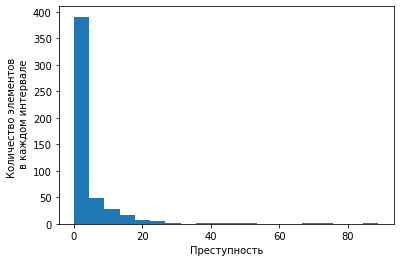

In [16]:
# CRIM
plt.hist(data.CRIM, 20)
plt.xlabel('Преступность')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Можно предположить, что распределение явлется экспоненциальным.

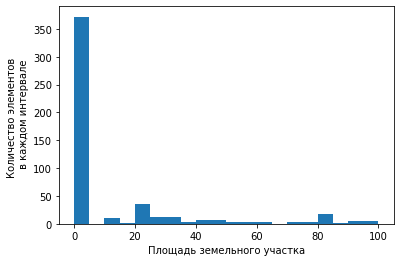

In [66]:
# ZN
plt.hist(data.ZN, 20)
plt.xlabel('Площадь земельного участка')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Тип распределения установить затруднительно.

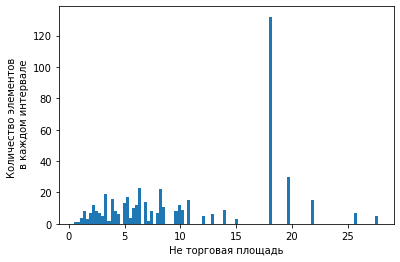

In [22]:
# INDUS
plt.hist(data.INDUS, 100)
plt.xlabel('Не торговая площадь')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Полимодальное распределение

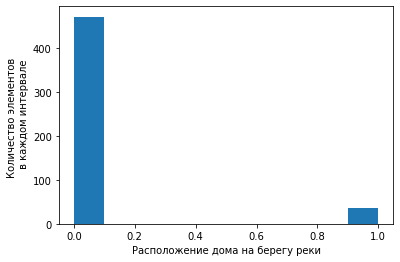

In [25]:
# CHAS
plt.hist(data.CHAS, 10)
plt.xlabel('Расположение дома на берегу реки')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Распределение Бернули

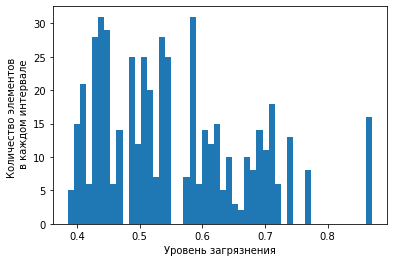

In [29]:
# NOX
plt.hist(data.NOX, 50)
plt.xlabel('Уровень загрязнения')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Тип распределения установить затруднительно.

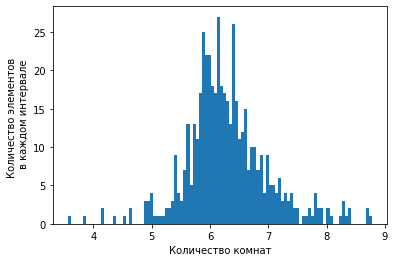

In [32]:
# RM
plt.hist(data.RM, 100)
plt.xlabel('Количество комнат')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Можно предположить, что распределение явлется экспоненциальным.

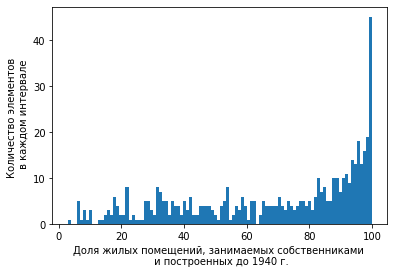

In [36]:
# AGE
plt.hist(data.AGE, 100)
plt.xlabel('Доля жилых помещений, занимаемых собственниками \n и построенных до 1940 г.')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Тип распределения установить затруднительно

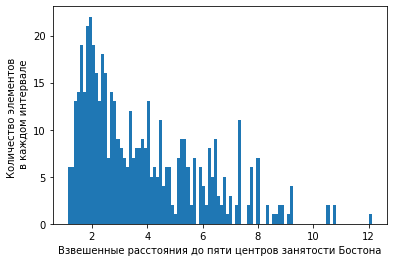

In [37]:
# DIS
plt.hist(data.DIS, 100)
plt.xlabel('Взвешенные расстояния до пяти центров занятости Бостона')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Возможно, распределение является логнормальным.

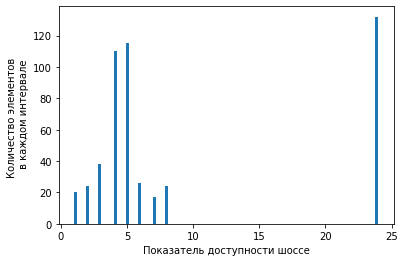

In [41]:
# RAD
plt.hist(data.RAD, 100)
plt.xlabel('Показатель доступности шоссе')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Возможно, биноминальное распределение (под вопросом значение 24)

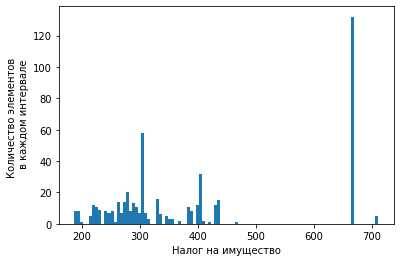

In [43]:
# TAX
plt.hist(data.TAX, 100)
plt.xlabel('Налог на имущество')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Возможно, полимодальное распределение

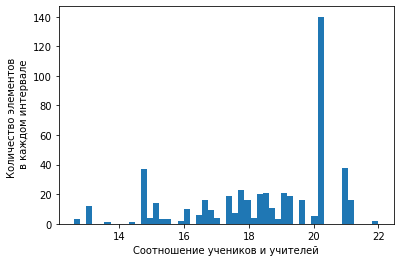

In [50]:
# PTRATIO
plt.hist(data.PTRATIO, 50)
plt.xlabel('Соотношение учеников и учителей')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Тип распределения установить затруднительно

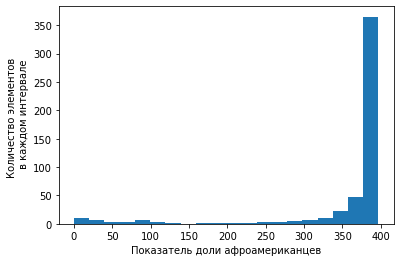

In [54]:
# B
plt.hist(data.B, 20)
plt.xlabel('Показатель доли афроамериканцев')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Тип распределения установить затруднительно

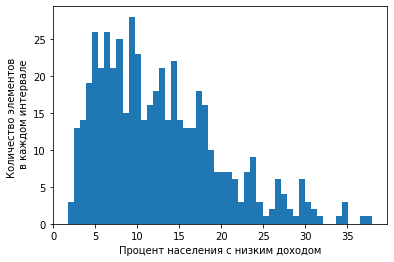

In [59]:
# LSTAT
plt.hist(data.LSTAT, 50)
plt.xlabel('Процент населения с низким доходом')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Возможно, распределение является логнормальным

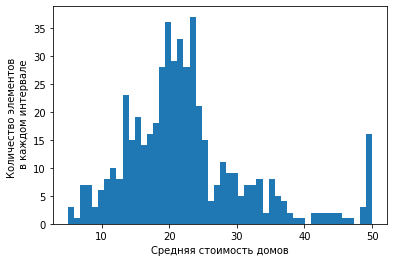

In [63]:
# MEDV
plt.hist(data.MEDV, 50)
plt.xlabel('Средняя стоимость домов')
plt.ylabel('Количество элементов \n в каждом интервале')
plt.show()

Если не принимать во внимание значение в окрестности 50, то распределение можно считать нормальным.

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

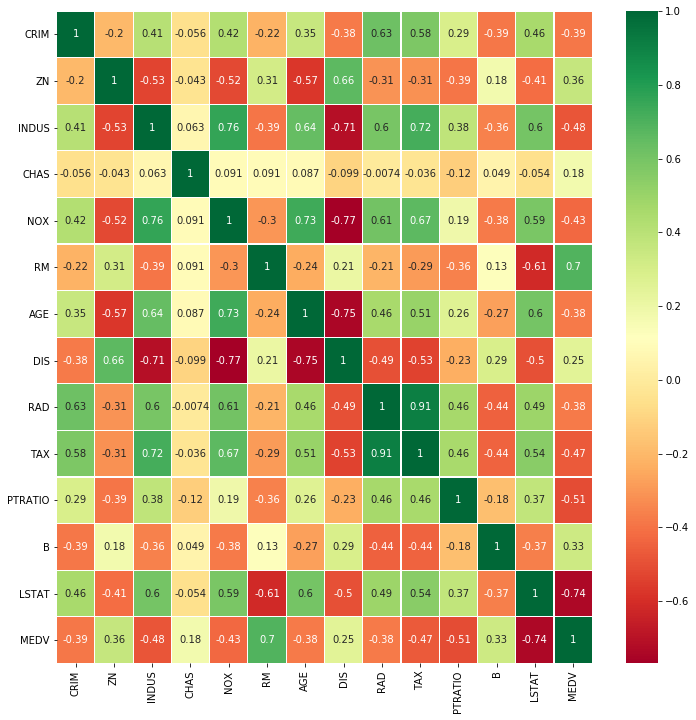

In [65]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True,cmap = 'RdYlGn', linewidths = 0.2) 
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Максимальная положительная кореляция:  
* переменная RM (Количество комнат) -- cor = 0.7;
* переменная ZN (Площадь земельного участка) -- cor = 0.36.  

Максимальная отрицательная кореляция (по модулю):
* переменная LSTAT (Процент населения с низким доходом) -- cor = -0.74;
* переменная PTRATIO (Соотношение учеников и учителей) -- cor = -0.51.

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [7]:
price = data['MEDV']
poverty = data['LSTAT']

In [8]:
price = np.array(price).reshape(-1,1)
poverty = np.array(poverty).reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    poverty,
    price,
    test_size = 0.2
)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(x_test)
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

29.479972533244876
4.06039673299243


In [17]:
def mape_vectorized(y_test, y_pred): 
    return (np.abs(y_test - y_pred) / y_test * 100)[y_test != 0].mean()

In [18]:
MAPE = mape_vectorized(y_test, y_pred)
round(MAPE)

17.0

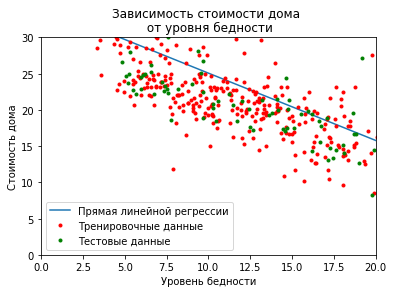

In [19]:
plt.xlabel('Уровень бедности')
plt.ylabel('Стоимость дома')
plt.title('Зависимость стоимости дома \n от уровня бедности')

x = np.linspace(0, 20, 201)

y = model.coef_* x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'g.')
plt.xlim(0, 20)
plt.ylim(0,30)
plt.legend(['Прямая линейной регрессии',
            'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [23]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head(20)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [24]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

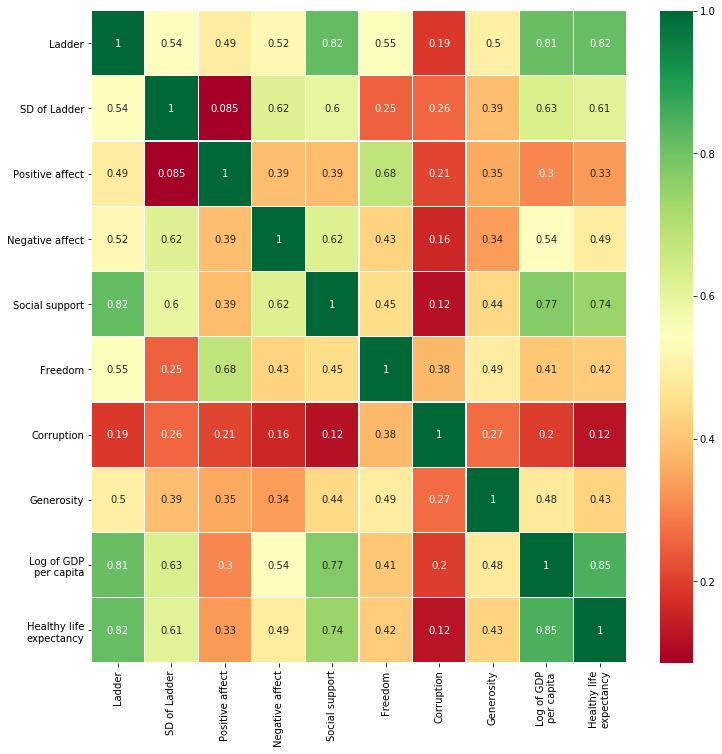

In [121]:
sns.heatmap(data.corr(), annot = True,cmap = 'RdYlGn', linewidths = 0.2) 
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Наибольшая кореляция:
* 0,85 (перменные Healthy life expectancy и Log of GDP per capita);  
* 0,82 (перменные Healthy life expectancy и Ladder).  

Наименьшая кореляция:
* 0,085 (переменные SD of Ladder и Positive affect);  
* 0,12 (переменные Corruption и Healthy life expectancy).

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [47]:
import random
numbers = []
for index in range(0,10) :
    number = random.randint(1,6)
    numbers.append(number)
numbers

[2, 4, 5, 4, 1, 5, 6, 6, 2, 3]

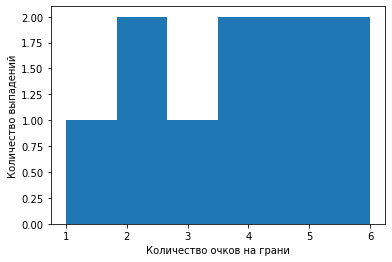

In [48]:
plt.hist(numbers, 6)
plt.xlabel('Количество очков на грани')
plt.ylabel('Количество выпадений')
plt.show()

Распределение дискретное, но равномерное.

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [65]:
summ = []
for index_1 in range(0,1000) :
    numbers = []
    for index_2 in range(0,100) :
        number = random.randint(1,6)
        numbers.append(number)
    summ.append(sum(numbers))

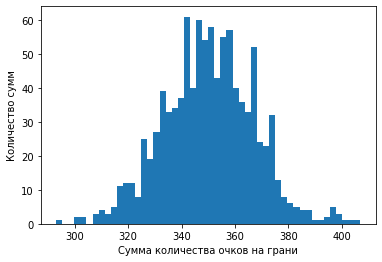

In [64]:
plt.hist(summ, 50)
plt.xlabel('Сумма количества очков на грани')
plt.ylabel('Количество сумм')
plt.show()

Распределение получаемых данных приближается к нормальному в соответсвии с центральной предельной теоремой.

ЦПТ может быть пременена, так как результаты каждого эксперимента независимы друг от друга и одинаково распределены.